In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile
import io
zf = zipfile.ZipFile('/content/Bus-Sekolah.zip', "r")
zf.extractall()


In [33]:
def getDf():
  months = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus']
  dfs = []
  i = 1
  for month in months:
        basepath = '/content/data-penumpang-bus-sekolah-bulan-'+month+'.csv'
        df = pd.read_csv(basepath, encoding='cp1252')        
        df['bulan'] = i
        dfs.append(df)
        i = i+1
        print(basepath)
  return pd.concat(dfs)

In [34]:
dfs = getDf()

/content/data-penumpang-bus-sekolah-bulan-januari.csv
/content/data-penumpang-bus-sekolah-bulan-februari.csv
/content/data-penumpang-bus-sekolah-bulan-maret.csv
/content/data-penumpang-bus-sekolah-bulan-april.csv
/content/data-penumpang-bus-sekolah-bulan-mei.csv
/content/data-penumpang-bus-sekolah-bulan-juni.csv
/content/data-penumpang-bus-sekolah-bulan-juli.csv
/content/data-penumpang-bus-sekolah-bulan-agustus.csv


In [35]:
dfs.isnull().sum()

type_operasi          0
area_operasi          0
jumlah_bus          210
jumlah_penumpang    211
bulan                 0
dtype: int64

In [39]:
dfs = dfs.dropna(axis = 0)
dfs.isnull().sum()

type_operasi        0
area_operasi        0
jumlah_bus          0
jumlah_penumpang    0
bulan               0
dtype: int64

In [56]:
dfs

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,bulan
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0,1
2,RSUD CENGKARENG,DEPOK,30.0,692.0,1
3,RSUD CENGKARENG,TANGERANG,70.0,1232.0,1
4,RSUD CENGKARENG,BEKASI,24.0,233.0,1
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0,1
...,...,...,...,...,...
278,RUTE ZONASI,ZONASI 9 (ROROTAN - MARUNDA),32.0,2.0,8
279,RUTE ZONASI,ZONASI 10 (RUSUNAWA - CILINCING),2.0,2.0,8
280,RUTE ZONASI,ZONASI 11 (RUSUN KAPUK MUARA - JEMBATAN LIMA -...,5.0,2.0,8
281,RUTE ZONASI,ZONASI 12 (RUSUN RAWABEBEK - CAKUNG TIMUR - RO...,7.0,2.0,8


In [59]:
dfs['type_operasi'].value_counts()

Puskesmas Ciracas                        162
Puskesmas Duren Sawit                    110
Puskesmas Pasar Minggu                   105
Puskesmas Pancoran                        97
Puskesmas Kramat Jati                     80
                                        ... 
Puskesmas Rawabadak Selatan Tahap II       1
Puskesmas Kemayoran                        1
Puskesmas Matraman (II)                    1
RS KETERGANTUNGAN OBAT                     1
Puskesmas Cempaka Putih (3)                1
Name: type_operasi, Length: 246, dtype: int64

Setelah diteliti lebih lanjut, type-type operasi yang dilakukan berada di area-area yang berhubungan dengan penanganan covid-19 yang berarti berada di lokasi kesehatan. Menurut berita, pada tahun 2021 pemerintah pun mulai mengalokasikan penggunaan bus sekolah sebagai tranportasi untuk mengevakuasi pasien covid-19 [Link](https://statistik.jakarta.go.id/alih-fungsi-bus-sekolah-untuk-membantu-penanganan-covid-19-di-dki-jakarta/)

In [65]:
gb_df = dfs.groupby(['area_operasi', 'bulan'], as_index = False).agg({'jumlah_bus': 'sum',
                                                                             'jumlah_penumpang': 'sum'})

In [73]:
gb_df = gb_df[gb_df['jumlah_penumpang']  > 500]

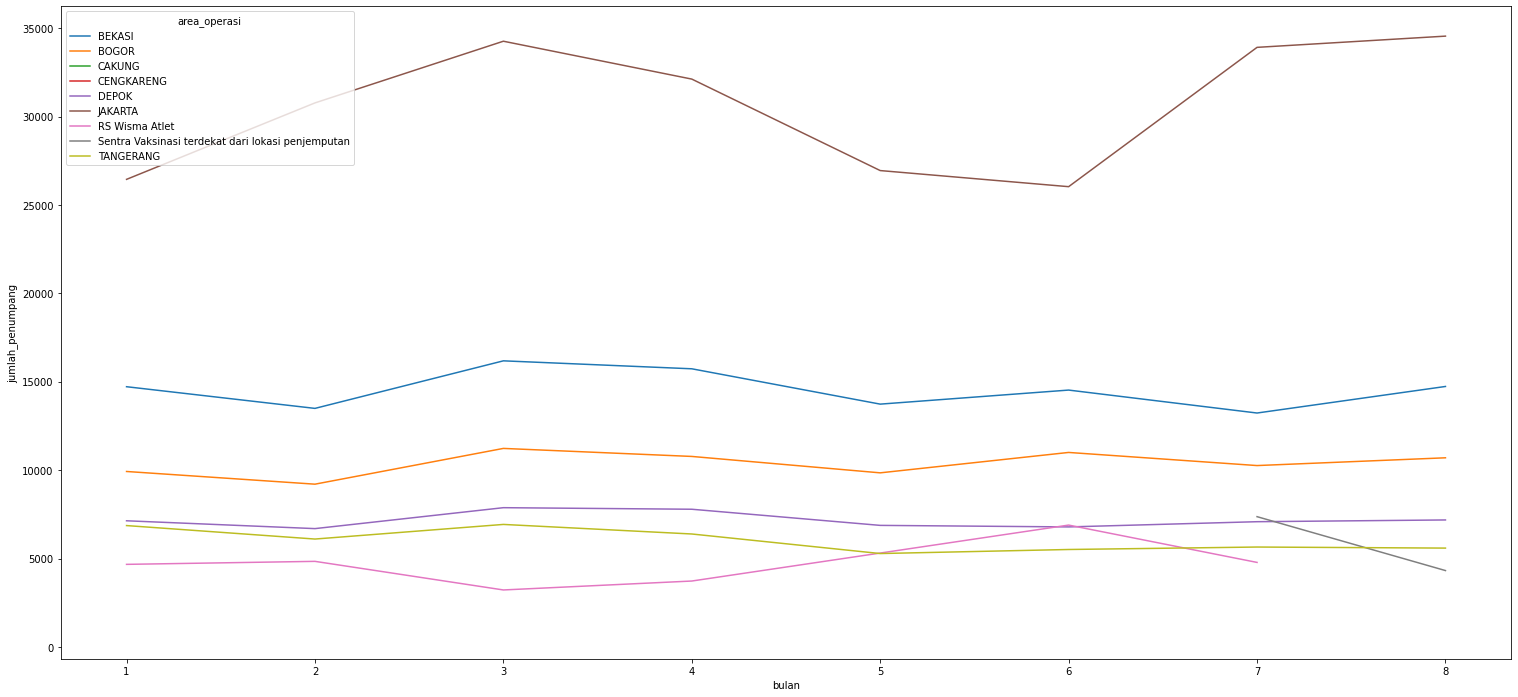

In [74]:
plt.figure(figsize=(26, 12))
sns.color_palette("bright")
sns.lineplot(data=gb_df, x='bulan', y='jumlah_penumpang', hue='area_operasi')
plt.show()

Dari line chart di atas, telah dicantum top 9 area operasi dengan jumlah penumpang covid-19 terbanyak. Juga terlihat bahwa daerah JAKARTA menduduki peringkat pertama dengan jumlah penumpang terbanyak, yang bisa dibilang jauh dari daerah-daerah lainnya

In [76]:
gb_df2 = dfs.copy()
gb_df2['penumpang_per_bus'] = gb_df2['jumlah_penumpang'] / gb_df2['jumlah_bus']
gb_df2

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,bulan,penumpang_per_bus
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0,1,41.624000
2,RSUD CENGKARENG,DEPOK,30.0,692.0,1,23.066667
3,RSUD CENGKARENG,TANGERANG,70.0,1232.0,1,17.600000
4,RSUD CENGKARENG,BEKASI,24.0,233.0,1,9.708333
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0,1,51.442105
...,...,...,...,...,...,...
278,RUTE ZONASI,ZONASI 9 (ROROTAN - MARUNDA),32.0,2.0,8,0.062500
279,RUTE ZONASI,ZONASI 10 (RUSUNAWA - CILINCING),2.0,2.0,8,1.000000
280,RUTE ZONASI,ZONASI 11 (RUSUN KAPUK MUARA - JEMBATAN LIMA -...,5.0,2.0,8,0.400000
281,RUTE ZONASI,ZONASI 12 (RUSUN RAWABEBEK - CAKUNG TIMUR - RO...,7.0,2.0,8,0.285714


In [77]:
gb_df2 = gb_df2.groupby(['area_operasi', 'bulan'], as_index = False).agg({'penumpang_per_bus' : 'mean'})

In [81]:
gb_df2

,area_operasi,bulan,penumpang_per_bus
0,BEKASI,1,25.433985
1,BEKASI,2,27.035309
2,BEKASI,3,28.895131
3,BEKASI,4,30.588326
4,BEKASI,5,28.899895
...,...,...,...
131,ZONASI 5 (PULOGADUNG - MARDANI - PASEBAN),8,0.166667
132,ZONASI 6 (CAWANG - RAGUNAN),8,0.142857
133,ZONASI 7 (RAWAMANGUN - MANGGARAI - CIKINI),8,0.250000
134,ZONASI 8 (LUBANG BUAYA - DUKU.5 (JASA MARGA) -...,8,inf


In [98]:
x = gb_df2[gb_df2['penumpang_per_bus'] > gb_df2['penumpang_per_bus'].quantile(0.4)]

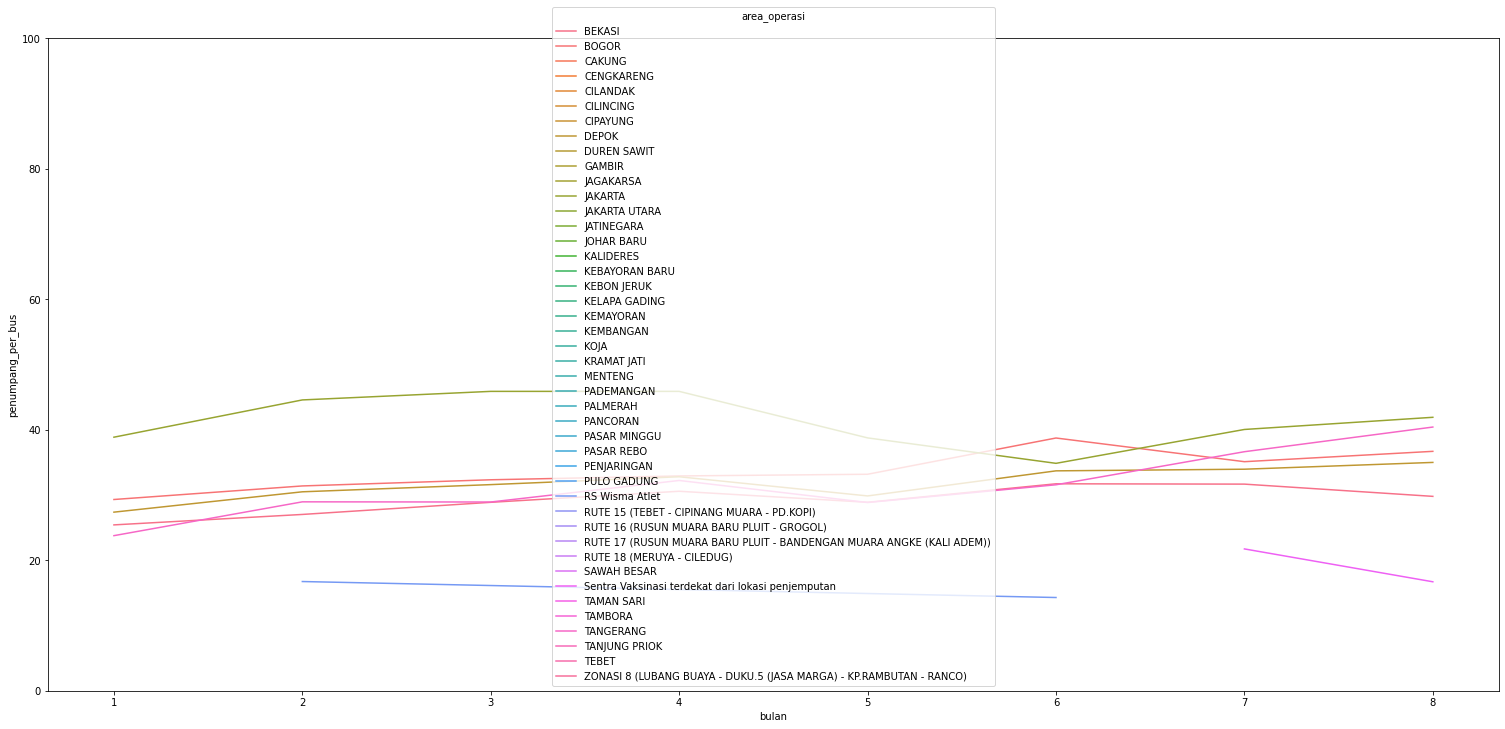

In [99]:
plt.figure(figsize=(26, 12))
sns.color_palette("bright")
sns.lineplot(data=x, x='bulan', y='penumpang_per_bus', hue='area_operasi')
plt.ylim(0, 100)
plt.show()

Terbukti juga bahwa bus-bus sekolah di daerah Jakarta memiliki ratio penumpang/bus tertinggi, dimana memiliki rata-rata 30-50 penumpang per bulannya

Ini sesuai dengan data bahwa daerah Jakarta sampai sekarang masih merupakan daerah dengan kasus covid tertinggi per bulannya, namun mulai turun sejak bulan ke 6